In [1]:
import numpy as np 
import os
import sys
import cv2
import matplotlib.pyplot as plt
import skimage

### Function return the closet cluster centroid to each sample in data

In [2]:
def findClosetCentroids(data,centroids):
    """Return the closet centroid index to each data point"""
    nSample=data.shape[0]
    #number of clusters
    K=centroids.shape[0]
    index=np.zeros((nSample,1))
    temp=np.zeros((K,1))
    for i in range(nSample):
        for j in range(K):
            temp[j]=np.sum((data[i,:]-centroids[j,:])**2)
            index[i]=np.argmin(temp)
    return index

### Function to update the cluster's centroid base on the mean of members in each cluster

In [3]:
def updateCentroids(data,index,K):
    """Update the centroids"""
    temp=np.zeros((K,data.shape[1]))
    count=np.zeros((K,1))
    for i in range(index.shape[0]):
        temp[int(index[i])]+=data[i]
        count[int(index[i])]+=1
    centroids=temp/count
    print("Number of samples each cluster:\n",count)
    print("Centroids:\n",centroids)
    print("------------------------------------------------")
    return centroids

### Initialize centroids list randomlly, each one is picked in the data sample

In [4]:
def randomInitCentroids(data,K):
    print(data.shape)
    centroids=np.zeros((K,data.shape[1]))
    for i in range(K):
        centroids[i]=data[np.random.randint(0,data.shape[0]+1)]
    return centroids

### Implement K-mean clustering algorithm

In [5]:
def KmeanClustering(data,K,epoch=500):
    """K-mean clustering implementation"""
    centroids=randomInitCentroids(data,K)
    for i in range(epoch):
        print("Number of iterations:",i+1)
        index=findClosetCentroids(data,centroids)
        centroids=updateCentroids(data,index,centroids.shape[0])
    return centroids

### Logistic regression implementation

In [6]:
class LogisticRegression:
    def __init__(self, threshold=0.5):
        self.threshold = threshold
        
    def predict(self, x):
        z = np.sum(x * self.W, axis=1)
        return 1 / (1 + np.exp(-z))

    def learn(self, x, y, learning_rate):
        y_hat = self.predict(x)
        new_W = np.matmul(x.T, y - y_hat)
        self.W = self.W + learning_rate * new_W
        
    def evaluate(self, x, y):
        y_pred = self.predict(x)
        return {
            "loss": -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)),
            "accuracy": np.sum((y_pred > self.threshold).astype(int) == y) / y.shape[0]
        }
    
    def fit(
        self, x, y, x_valid = None, y_valid = None,
        learning_rate = 0.001,
        learning_rate_decay = 1,
        batch_size = 32,
        epoch = 1,
        verbose = False
    ):
        self.W = np.random.rand(x.shape[1])
        if x_valid is None:
            x_valid = x
        if y_valid is None:
            y_valid = y
        step = x.shape[0] // batch_size + (x.shape[0] % 2 == 0)
        metric_graph = {
            "loss": [],
            "accuracy": []
        }
        for e in range(epoch):
            for i in range(step):
                self.learn(
                    x[batch_size * i : batch_size * (i + 1),],
                    y[batch_size * i : batch_size * (i + 1),],
                    learning_rate
                )
                metrics = self.evaluate(x_valid, y_valid)
                if (e <= 5 or (i + 1) == step) and verbose:
                    metrics = self.evaluate(x_valid, y_valid)
                    print("Epoch %d Step %d: Loss %f, Acc %f" % (e + 1, i + 1, metrics["loss"], metrics["accuracy"]))
            
            metrics = self.evaluate(x_valid, y_valid)
            metric_graph["loss"].append(metrics["loss"])
            metric_graph["accuracy"].append(metrics["accuracy"])
            learning_rate *= learning_rate_decay
        
        plt.plot(metric_graph["loss"])
        plt.title("Loss")
        plt.show()
        plt.title("Accuracy")
        plt.plot(metric_graph["accuracy"])
        plt.show()

### Training

In [7]:
img=skimage.io.imread("test1.jpg")
data=img.reshape(-1,3)
print(data)

ret_list=[]
for i,k in enumerate([2,4,6,8]):
    print("K-mean clustering with K=",k)
    centroids=KmeanClustering(data,k,20)
    index=findClosetCentroids(data,centroids)
    flat_ret=data.copy()
    for j in range(flat_ret.shape[0]):
        flat_ret[j]=centroids[int(index[j])]
    ret=flat_ret.reshape(img.shape)
    ret_list.append(ret)

[[32 24 22]
 [32 24 22]
 [32 24 22]
 ...
 [ 7  5  8]
 [ 6  4  7]
 [ 5  3  6]]
K-mean clustering with K= 2
(57600, 3)
Number of iterations: 1
Number of samples each cluster:
 [[23252.]
 [34348.]]
Centroids:
 [[ 42.41746946  21.90263203  21.37635472]
 [190.104402   135.44678002 130.06367183]]
------------------------------------------------
Number of iterations: 2
Number of samples each cluster:
 [[30462.]
 [27138.]]
Centroids:
 [[ 56.92203401  31.64106099  31.25842033]
 [213.06057926 154.68184833 147.8471516 ]]
------------------------------------------------
Number of iterations: 3
Number of samples each cluster:
 [[33371.]
 [24229.]]
Centroids:
 [[ 64.48440263  34.53213868  35.15162866]
 [221.39122539 165.47253292 156.48293367]]
------------------------------------------------
Number of iterations: 4
Number of samples each cluster:
 [[34167.]
 [23433.]]
Centroids:
 [[ 66.8741183   35.41882518  36.22027102]
 [223.23684547 168.62761917 159.04630222]]
------------------------------------

Number of samples each cluster:
 [[ 8888.]
 [19960.]
 [14254.]
 [14498.]]
Centroids:
 [[199.58438344 123.85092259 118.61374887]
 [ 32.46978958  20.5246994   19.75896794]
 [115.26813526  56.5231514   59.48084748]
 [238.03021106 196.26603669 184.02552076]]
------------------------------------------------
Number of iterations: 13
Number of samples each cluster:
 [[ 8889.]
 [19940.]
 [14242.]
 [14529.]]
Centroids:
 [[199.38947013 123.56879289 118.3921701 ]
 [ 32.43159478  20.50240722  19.73570712]
 [115.09022609  56.44832186  59.39615223]
 [237.9945626  196.19024021 183.95154519]]
------------------------------------------------
Number of iterations: 14
Number of samples each cluster:
 [[ 8881.]
 [19922.]
 [14239.]
 [14558.]]
Centroids:
 [[199.24794505 123.32349961 118.23353226]
 [ 32.39328381  20.4869491   19.71895392]
 [114.96046071  56.3967273   59.32467168]
 [237.95954115 196.1255667  183.87642533]]
------------------------------------------------
Number of iterations: 15
Number of sam

Number of samples each cluster:
 [[ 8100.]
 [15831.]
 [14001.]
 [ 4442.]
 [ 8322.]
 [ 6904.]]
Centroids:
 [[103.4782716   79.7017284   74.00518519]
 [ 24.69667109  17.35165182  17.21628451]
 [238.67523748 197.37311621 185.24169702]
 [171.48671769  26.0434489   55.27712742]
 [201.88163903 133.44977169 123.66678683]
 [ 72.90773465  36.45031866  32.47566628]]
------------------------------------------------
Number of iterations: 15
Number of samples each cluster:
 [[ 8053.]
 [15902.]
 [13919.]
 [ 4448.]
 [ 8331.]
 [ 6947.]]
Centroids:
 [[103.85856203  79.97814479  74.29616292]
 [ 24.79405106  17.40397434  17.26581562]
 [238.76916445 197.55291328 185.44450032]
 [172.34060252  26.46155576  55.98853417]
 [202.1721282  134.2467891  124.13779858]
 [ 73.56470419  36.69699151  32.70059018]]
------------------------------------------------
Number of iterations: 16
Number of samples each cluster:
 [[ 8027.]
 [15962.]
 [13872.]
 [ 4457.]
 [ 8305.]
 [ 6977.]]
Centroids:
 [[104.29238819  80.25837797 

Number of samples each cluster:
 [[ 4469.]
 [ 2998.]
 [ 9738.]
 [19131.]
 [ 5929.]
 [ 4493.]
 [ 5554.]
 [ 5288.]]
Centroids:
 [[181.31528306  93.17968226  98.09040054]
 [250.7161441  219.84823215 210.59673115]
 [ 90.99445471  70.21287739  64.62374204]
 [ 31.01447912  19.52427996  18.84172286]
 [229.18384213 180.89728453 166.80080958]
 [151.84932117  18.61807256  40.7277988 ]
 [207.97155203 145.01368383 130.98307526]
 [241.76361573 201.8214826  190.15431165]]
------------------------------------------------
Number of iterations: 12
Number of samples each cluster:
 [[ 4379.]
 [ 3302.]
 [ 9730.]
 [19103.]
 [ 5696.]
 [ 4460.]
 [ 5433.]
 [ 5497.]]
Centroids:
 [[180.93628682  91.50902032  97.14638045]
 [250.37310721 219.05027256 209.71441551]
 [ 90.81880781  70.13823227  64.57810894]
 [ 30.95822646  19.50044496  18.81845783]
 [228.14027388 179.03072331 164.80073736]
 [151.22107623  18.41188341  40.26591928]
 [206.81262654 143.3859746  129.5866004 ]
 [240.91995634 200.42386756 188.54284155]]


Visualize the result with k in {2,4,6,8}

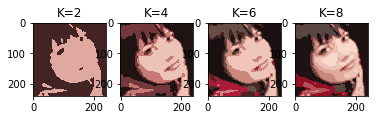

In [8]:
for i,img in enumerate(ret_list):
    plt.subplot(1,4,i+1)
    plt.title("K=%d"%(2*i+2))
    plt.imshow(img)